<a href="https://colab.research.google.com/github/iam-fern/Generate_addition_4X/blob/main/GQtest_cluster_data_add_delta_(_0_4)_n120_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition_4X/addition_delta_-0.4'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-0.4_n120.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,94.913559,80.446465,50.173758,90.218927,0.159765,325.912475,325.643127,0.269347
1,0.0,1.0,65.602973,55.052587,59.832815,32.073000,-0.288149,222.273226,222.375911,-0.102685
2,0.0,2.0,29.762440,59.760142,27.892403,87.377666,-0.023262,214.769390,214.756738,0.012652
3,0.0,3.0,69.272382,89.610372,30.136375,54.223092,-0.046303,253.195919,253.061423,0.134496
4,0.0,4.0,80.457512,74.524299,71.995804,98.603054,-0.400546,335.180123,335.551228,-0.371105
...,...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,47.035006,60.381895,95.535437,52.756386,0.196776,265.905500,265.824381,0.081119
119996,999.0,116.0,39.927223,97.599314,27.187312,27.471005,0.113176,202.298031,202.233403,0.064627
119997,999.0,117.0,74.564537,35.530876,59.240308,84.890523,-0.092350,264.133894,264.364963,-0.231069
119998,999.0,118.0,40.693720,44.953411,39.225313,56.132770,-0.430801,190.574413,191.067572,-0.493158


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    94.913559  80.446465  50.173758  90.218927  0.159765  325.912475   
      1.0    65.602973  55.052587  59.832815  32.073000 -0.288149  222.273226   
      2.0    29.762440  59.760142  27.892403  87.377666 -0.023262  214.769390   
      3.0    69.272382  89.610372  30.136375  54.223092 -0.046303  253.195919   
      4.0    80.457512  74.524299  71.995804  98.603054 -0.400546  335.180123   
...                ...        ...        ...        ...       ...         ...   
999.0 115.0  47.035006  60.381895  95.535437  52.756386  0.196776  265.905500   
      116.0  39.927223  97.599314  27.187312  27.471005  0.113176  202.298031   
      117.0  74.564537  35.530876  59.240308  84.890523 -0.092350  264.133894   
      118.0  40.693720  44.953411  39.225313  56.132770 -0.430801  190.574413   
      119.0  98.715803  27.780015  40.003229  92.238912  0.020434  268.758392   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    325.643127  0.269347  
      1.0    222.375911 -0.102685  
      2.0    214.756738  0.012652  
      3.0    253.061423  0.134496  
      4.0    335.551228 -0.371105  
...                 ...       ...  
999.0 115.0  265.824381  0.081119  
      116.0  202.233403  0.064627  
      117.0  264.364963 -0.231069  
      118.0  191.067572 -0.493158  
      119.0  268.918697 -0.160306  

[120000 rows x 8 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    94.913559  80.446465  50.173758  90.218927  0.159765  325.912475   
      1.0    65.602973  55.052587  59.832815  32.073000 -0.288149  222.273226   
      2.0    29.762440  59.760142  27.892403  87.377666 -0.023262  214.769390   
      3.0    69.272382  89.610372  30.136375  54.223092 -0.046303  253.195919   
      4.0    80.457512  74.524299  71.995804  98.603054 -0.400546  335.180123   
...                ...        ...        ...        ...       ...         ...   
999.0 115.0  47.035006  60.381895  95.535437  52.756386  0.196776  265.905500   
      116.0  39.927223  97.599314  27.187312  27.471005  0.113176  202.298031   
      117.0  74.564537  35.530876  59.240308  84.890523 -0.092350  264.133894   
      118.0  40.693720  44.953411  39.225313  56.132770 -0.430801  190.574413   
      119.0  98.715803  27.780015  40.003229  92.238912  0.020434  268.758392   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    325.643127  0.269347  
      1.0    222.375911 -0.102685  
      2.0    214.756738  0.012652  
      3.0    253.061423  0.134496  
      4.0    335.551228 -0.371105  
...                 ...       ...  
999.0 115.0  265.824381  0.081119  
      116.0  202.233403  0.064627  
      117.0  264.364963 -0.231069  
      118.0  191.067572 -0.493158  
      119.0  268.918697 -0.160306  

[120000 rows x 8 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,94.913559,80.446465,50.173758,90.218927,0.159765,325.912475,325.643127,0.269347
1,0.0,1.0,65.602973,55.052587,59.832815,32.073000,-0.288149,222.273226,222.375911,-0.102685
2,0.0,2.0,29.762440,59.760142,27.892403,87.377666,-0.023262,214.769390,214.756738,0.012652
3,0.0,3.0,69.272382,89.610372,30.136375,54.223092,-0.046303,253.195919,253.061423,0.134496
4,0.0,4.0,80.457512,74.524299,71.995804,98.603054,-0.400546,335.180123,335.551228,-0.371105
...,...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,47.035006,60.381895,95.535437,52.756386,0.196776,265.905500,265.824381,0.081119
119996,999.0,116.0,39.927223,97.599314,27.187312,27.471005,0.113176,202.298031,202.233403,0.064627
119997,999.0,117.0,74.564537,35.530876,59.240308,84.890523,-0.092350,264.133894,264.364963,-0.231069
119998,999.0,118.0,40.693720,44.953411,39.225313,56.132770,-0.430801,190.574413,191.067572,-0.493158


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    94.913559  80.446465  50.173758  90.218927  0.159765  325.912475   
      1.0    65.602973  55.052587  59.832815  32.073000 -0.288149  222.273226   
      2.0    29.762440  59.760142  27.892403  87.377666 -0.023262  214.769390   
      3.0    69.272382  89.610372  30.136375  54.223092 -0.046303  253.195919   
      4.0    80.457512  74.524299  71.995804  98.603054 -0.400546  335.180123   
...                ...        ...        ...        ...       ...         ...   
999.0 115.0  47.035006  60.381895  95.535437  52.756386  0.196776  265.905500   
      116.0  39.927223  97.599314  27.187312  27.471005  0.113176  202.298031   
      117.0  74.564537  35.530876  59.240308  84.890523 -0.092350  264.133894   
      118.0  40.693720  44.953411  39.225313  56.132770 -0.430801  190.574413   
      119.0  98.715803  27.780015  40.003229  92.238912  0.020434  268.758392   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    325.643127  0.269347  
      1.0    222.375911 -0.102685  
      2.0    214.756738  0.012652  
      3.0    253.061423  0.134496  
      4.0    335.551228 -0.371105  
...                 ...       ...  
999.0 115.0  265.824381  0.081119  
      116.0  202.233403  0.064627  
      117.0  264.364963 -0.231069  
      118.0  191.067572 -0.493158  
      119.0  268.918697 -0.160306  

[120000 rows x 8 columns]

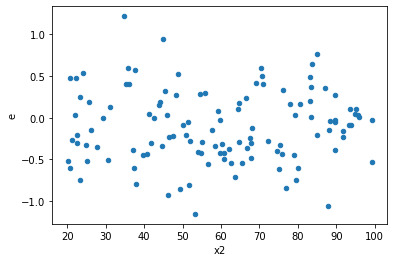

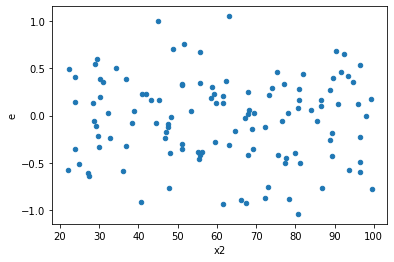

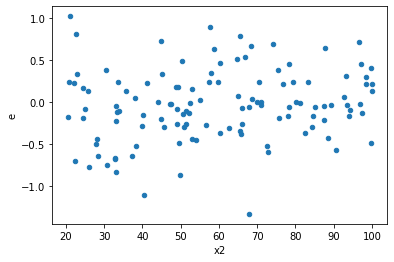

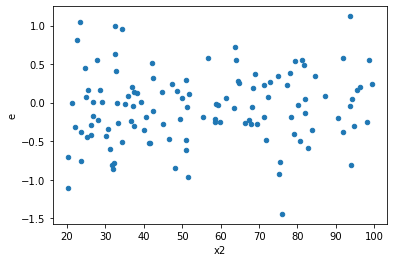

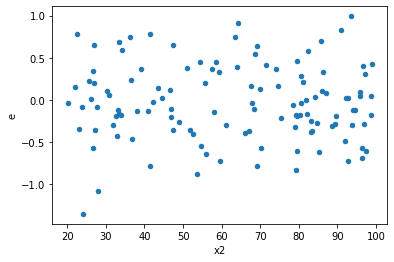

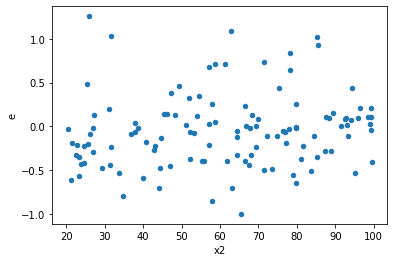

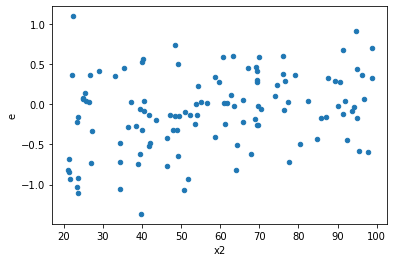

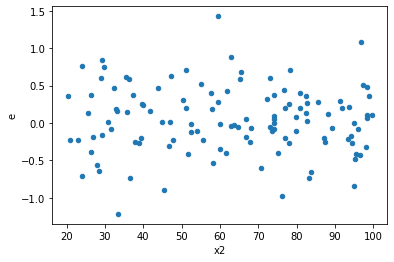

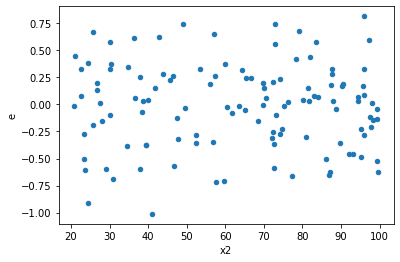

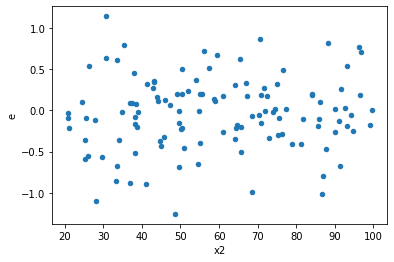

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["x1", "x2", "x3", "x4"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,48.0,64.0,7.622861490951647,12.236244519443265,0.15880961439482597,0.191191320616301,1.203902681489856,0.4842016493321646,0.7578991753339177,0.2421008246660823,Reject001=1 : Homoscedasticity
2.0,50.0,62.0,6.567566863663376,12.68733836419329,0.1313513372732675,0.20463448974505305,1.557917064211725,0.09733966413440909,0.9513301679327955,0.048669832067204544,Reject001=1 : Homoscedasticity
6.0,59.0,53.0,12.108677725087334,11.817283923929105,0.20523182584893787,0.22296762120620953,1.0864183480505902,0.7617048630339647,0.6191475684830177,0.38085243151698234,Reject001=1 : Homoscedasticity
7.0,55.0,57.0,10.636871241331265,11.199689427071155,0.19339765893329575,0.19648577942230097,1.0159677242529102,0.9516793309306546,0.5241603345346727,0.4758396654653273,Reject001=1 : Homoscedasticity
9.0,54.0,58.0,8.88720674532564,12.288470244051812,0.16457790269121556,0.21187017662158297,1.2873549435071983,0.3453475644846069,0.8273262177576965,0.17267378224230345,Reject001=1 : Homoscedasticity
14.0,49.0,63.0,7.96592330810394,17.938689611572336,0.16256986343069266,0.2847411049455926,1.7514999332393757,0.03631791135143403,0.981841044324283,0.018158955675717015,Reject001=1 : Homoscedasticity
15.0,62.0,50.0,10.555278975784157,9.9454687005996,0.17024643509329285,0.198909374011992,1.168361463210623,0.5722332248448825,0.7138833875775588,0.28611661242244124,Reject001=1 : Homoscedasticity
16.0,48.0,64.0,10.748117952794987,16.207653394631013,0.22391912401656222,0.2532445842911096,1.1309645185659902,0.6399277498125171,0.6800361250937415,0.31996387490625855,Reject001=1 : Homoscedasticity
18.0,59.0,53.0,10.387404912042571,10.394596817371726,0.1760577103736029,0.1961244682522967,1.113978296299044,0.6919477729929921,0.6540261135035039,0.3459738864964961,Reject001=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,48.0,64.0,7.622861490951647,12.236244519443265,0.15880961439482597,0.191191320616301,1.203902681489856,0.4842016493321646,Reject001=1 : Homoscedasticity
1.0,54.0,58.0,11.421478982062562,10.566254330547606,0.21150887003819557,0.18217679880254492,0.8613199000573655,0.5810817508706086,Reject001=1 : Homoscedasticity
2.0,50.0,62.0,6.567566863663376,12.68733836419329,0.1313513372732675,0.20463448974505305,1.557917064211725,0.09733966413440909,Reject001=1 : Homoscedasticity
3.0,49.0,63.0,11.018890715532416,13.631088677919578,0.22487532072515135,0.21636648695110441,0.9621619938256957,0.8956340931381445,Reject001=1 : Homoscedasticity
4.0,50.0,62.0,11.171243824418802,11.638661861680896,0.22342487648837606,0.18772035260775638,0.84019450098039,0.5268394295248587,Reject001=1 : Homoscedasticity
5.0,59.0,53.0,11.401982050066868,7.072338773025294,0.19325393305198083,0.13344035420802441,0.6904923077148036,0.16666767815961672,Reject001=1 : Homoscedasticity
6.0,59.0,53.0,12.108677725087334,11.817283923929105,0.20523182584893787,0.22296762120620953,1.0864183480505902,0.7617048630339647,Reject001=1 : Homoscedasticity
7.0,55.0,57.0,10.636871241331265,11.199689427071155,0.19339765893329575,0.19648577942230097,1.0159677242529102,0.9516793309306546,Reject001=1 : Homoscedasticity
8.0,55.0,57.0,9.316344418142851,7.672101283688855,0.16938808032987002,0.1345982681348922,0.7946147560842098,0.3935939429591035,Reject001=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      977
Reject001=0 : Heteroscedasticity     23
Name: Result_test, dtype: int64